In [1]:
# Set dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# import psycopg2
# import sys, os
# import config as creds
# import pandas.io.sql as psql

# Import necessary keys
from config import pghost
from config import pgport
from config import pguser
from config import pgpwd

In [2]:
# Connect with postgres server
engine = create_engine(f'postgresql://{pguser}:{pgpwd}@{pghost}:{pgport}/postgres')
connection = engine.connect()

In [3]:
# Load data into dataframe

# ("select * from \"StudentScores\"", dbConnection)

salary = pd.read_sql(
    "SELECT e.emp_no, e.emp_title_id, s.salary, t.title \
    FROM employees AS e \
    INNER JOIN salaries AS s \
    ON e.emp_no = s.emp_no \
    INNER JOIN titles as t \
    ON e.emp_title_id = t.title_id", connection)

In [4]:
# View dataframe
salary.head()

,emp_no,emp_title_id,salary,title
0,57444,e0002,48973,Engineer
1,13616,e0003,40000,Senior Engineer
2,240129,e0004,43548,Technique Leader
3,427958,s0001,63377,Staff
4,35916,e0003,40000,Senior Engineer


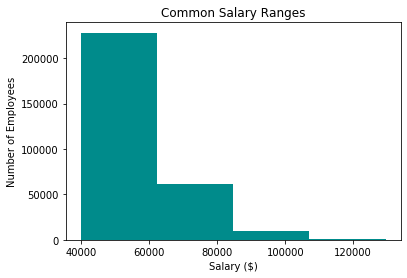

In [6]:
# Create a histogram to view the distribution of salary across four bins
x = salary['salary']
bins = 4

n, bins, patches = plt.hist(x, bins, facecolor='darkcyan')
plt.title("Common Salary Ranges")
plt.xlabel("Salary ($)")
plt.ylabel("Number of Employees")
plt.savefig("images/salary_ranges.png")
plt.show()

In [20]:
# Check the max and min salary
min = salary['salary'].min()
max = salary['salary'].max()

print(f'Minimum salary: {min}')
print(f'Maximum salary: {max}')

Minimum salary: 40000
Maximum salary: 129492


In [24]:
# Create 4 bins in which to place values based on salary
bins = [39999, 62499, 84999, 107499, 130000]

# Label these bins
labels = ['40,000-62,499', '62,500-84,999', '85,000-107,499', '107,500-130,000']

In [25]:
# Slice the data and place it into bins
pd.cut(salary['salary'], bins, labels=labels).head()

0    40,000-62,499
1    40,000-62,499
2    40,000-62,499
3    62,500-84,999
4    40,000-62,499
Name: salary, dtype: category
Categories (4, object): [40,000-62,499 < 62,500-84,999 < 85,000-107,499 < 107,500-130,000]

In [26]:
# Place the data series into a new column inside of dataframe
salary['salary_range']=pd.cut(salary['salary'], bins, labels=labels)
salary.head()

,emp_no,emp_title_id,salary,title,salary_range
0,57444,e0002,48973,Engineer,"40,000-62,499"
1,13616,e0003,40000,Senior Engineer,"40,000-62,499"
2,240129,e0004,43548,Technique Leader,"40,000-62,499"
3,427958,s0001,63377,Staff,"62,500-84,999"
4,35916,e0003,40000,Senior Engineer,"40,000-62,499"


In [33]:
# Create a GroupBy object based upon salary_range
salary_new = salary.groupby('salary_range')

# Store frequencies of occurences to list
salary_count = salary_new['emp_no'].count().values.tolist()

[228471, 61338, 9863, 352]